In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set {len(train_set)}\nrows in test set {len(test_set)}")

rows in train set 404
rows in test set 102


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
spl=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in spl.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [9]:
housing=strat_train_set.copy()

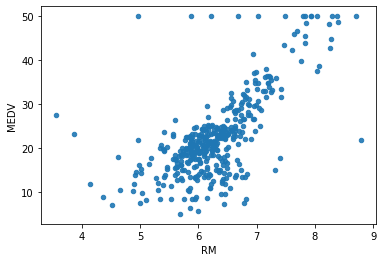

In [10]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.9)

In [11]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

In [12]:
median=housing['RM'].median()

In [13]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [15]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                     ('std_scaler',StandardScaler())])

In [17]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
housing_predictions=model.predict(housing_num_tr)
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [20]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [21]:
def print_score(score):
    print("Mean: ",score.mean())
    print("Std dev.: ",score.std())

In [22]:
print_score(rmse_scores)

Mean:  3.355713300429496
Std dev.:  0.680333825262412


In [23]:
from joblib import dump, load
dump (model,"Wakanda.joblib")

['Wakanda.joblib']

## Testing the Data

In [24]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prep=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prep)
fin_mse=mean_squared_error(Y_test,final_predictions)
fin_rmse=np.sqrt(fin_mse)
# fin_rmse
final_predictions

array([24.73 , 10.904, 25.943, 21.587, 18.77 , 14.847, 20.056, 15.003,
       32.497, 42.043, 19.471, 11.573, 23.785, 29.213, 19.527, 11.013,
       31.364, 14.348, 23.692, 17.719, 19.788, 17.682, 17.015, 21.88 ,
       18.684, 30.651, 16.222, 32.074,  8.997, 34.499, 23.515, 21.269,
       22.714, 10.792, 21.07 , 11.332, 43.128, 24.729, 23.094, 40.881,
       23.718, 30.13 , 20.612, 20.595, 19.349, 33.847, 44.221, 19.88 ,
       20.421, 21.946, 21.319, 14.508, 21.545, 14.841, 25.161, 33.542,
       43.076, 28.909, 19.815, 20.704, 46.686,  9.515, 19.262, 25.447,
       15.434, 33.449, 19.774, 18.176, 19.242, 34.221, 26.194, 22.404,
       21.371, 22.279, 34.821, 13.328, 15.571, 20.07 , 20.477, 21.108,
       22.254, 20.736, 13.672, 22.739, 20.687, 21.351, 13.855, 21.157,
       21.926, 23.064, 19.036, 27.231,  7.31 , 26.609, 18.799, 28.565,
       19.633, 31.251, 14.571, 26.747, 21.453, 20.16 ])

## Using the Model

In [25]:
#feature for next step
list(strat_test_set.iloc[1])
# (strat_test_set.iloc[6])

[17.8667,
 0.0,
 18.1,
 0.0,
 0.6709999999999999,
 6.223,
 100.0,
 1.3861,
 24.0,
 666.0,
 20.2,
 393.74,
 21.78,
 10.2]

In [30]:
from joblib import dump,load
import numpy as np
#put any feature array
features=np.array([[17.8667,
 0.0,
 18.1,
 0.0,
 0.6709999999999999,
 6.223,
 100.0,
 1.3861,
 24.0,
 666.0,
 20.2,
 393.74,
 21.78]])
features=my_pipeline.transform(features)
model.predict(features)

array([21.216])